In [5]:
filePath = "/home/naymeeysh/Desktop/UG4-2/BRSM/Project/OptimalQuittingExperiment/full_experiment_data.pkl"

import pandas as pd
df = pd.read_pickle(filePath)
df.head()

,subjectID,prolificID,probability_truncation,inst_time,tut_time,date,total_win,quiz_failed,practice_data,press_data,feedback
0,4610916,5c71b63c4aa8ec0001f2bfc4,0.8,26451,23471,Thu Jun 23 2022 15:35:22 GMT-0400 (Eastern Day...,62,0,"[{'press_number': 0, 'button_number': 0, 'curr...","[{'press_number': 0, 'button_number': 0, 'curr...",none
1,38505644,5eceed79840590300f53fa51,0.7,12032,34176,Thu Jun 23 2022 15:35:26 GMT-0400 (Eastern Day...,32,0,"[{'press_number': 0, 'button_number': 0, 'curr...","[{'press_number': 0, 'button_number': 0, 'curr...",none
2,81698333,5e86c320939b3030601f7fcb,0.8,26082,38275,Thu Jun 23 2022 15:35:58 GMT-0400 (Eastern Day...,55,0,"[{'press_number': 0, 'button_number': 0, 'curr...","[{'press_number': 0, 'button_number': 0, 'curr...",none
3,17600547,6110d7f556da416401efdd5f,0.7,32050,34005,Thu Jun 23 2022 12:36:02 GMT-0700 (Pacific Day...,59,0,"[{'press_number': 0, 'button_number': 0, 'curr...","[{'press_number': 0, 'button_number': 0, 'curr...",none
4,3000333,60d3740f31606cb50e49f00c,0.9,53103,43115,Thu Jun 23 2022 15:36:24 GMT-0400 (Eastern Day...,60,0,"[{'press_number': 0, 'button_number': 0, 'curr...","[{'press_number': 0, 'button_number': 0, 'curr...",Good survey


In [6]:
# for user id 0 print all attributes
attributes = ['subjectID', 'probability_truncation', 'total_win',  'practice_data', 'press_data']

# for subjectID = 4610916 , loop over attributes and print
for attribute in attributes:
    print(attribute, df.loc[0, attribute])
    
# get press_number
press_data = df.loc[1, 'press_data']
practice_data = df.loc[4, 'practice_data']

# # pretty print press_data
# for press in press_data:
#     print(press)

print()
# # pretty print practice_data
for press in practice_data:
    print(press)

subjectID 4610916
probability_truncation 0.8
total_win 62
practice_data [{'press_number': 0, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 1, 'press_time': 1107}, {'press_number': 1, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 147}, {'press_number': 2, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 1, 'press_time': 201}, {'press_number': 3, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 180}, {'press_number': 4, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 401}, {'press_number': 5, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 196}, {'press_number': 6, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 181}, {'press_number': 7, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 1, 'press_time': 180}, {'press_number': 8, 'button_number': 0, 'current_p': 0.197063153303638

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import data_process as dp
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KernelDensity
import logit_analysis as logit

In [8]:
truncation_choices = [0.9, 0.8, 0.7]
plot_legend = []
for el in truncation_choices:
    plot_legend.append("Cap " + str(el))

df = pd.read_pickle('full_experiment_data.pkl')
print(df.shape[0],"original number of subjects")
for el in truncation_choices:
    print(df[df['probability_truncation'] == el].shape[0], "subjects in %.1lf cap group" % el)
print('')

#Filtering out too many quiz fails
df = df[df['quiz_failed'] < 2]

#Discarding subjects who kept loosing buttons for too long
experiment_total = dp.Decision_Process(df, drop_first_button=False)
suboptimal_subjects = np.array([True if max([(btn[:,1]-btn[:,0]).max() for btn in subj]) > 20 else False for subj in experiment_total.subjects_button_activity])
df = df[~suboptimal_subjects]
print(df.shape[0],"subjects remain after filtering")

3632 original number of subjects
1214 subjects in 0.9 cap group
1203 subjects in 0.8 cap group
1215 subjects in 0.7 cap group

3390 subjects remain after filtering


In [9]:
# for user id 0 print all attributes
attributes = ['subjectID', 'probability_truncation', 'total_win',  'practice_data', 'press_data']

# for subjectID = 4610916 , loop over attributes and print
for attribute in attributes:
    print(attribute, df.loc[0, attribute])
    
# get press_number
press_data = df.loc[1, 'press_data']

# pretty print press_data
for press in press_data:
    print(press)

subjectID 4610916
probability_truncation 0.8
total_win 62
practice_data [{'press_number': 0, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 1, 'press_time': 1107}, {'press_number': 1, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 147}, {'press_number': 2, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 1, 'press_time': 201}, {'press_number': 3, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 180}, {'press_number': 4, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 401}, {'press_number': 5, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 196}, {'press_number': 6, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 0, 'press_time': 181}, {'press_number': 7, 'button_number': 0, 'current_p': 0.1970631533036384, 'outcome': 1, 'press_time': 180}, {'press_number': 8, 'button_number': 0, 'current_p': 0.197063153303638

In [10]:
experiment_total = dp.Decision_Process(df, drop_first_button=False)
experiment_split = []
for el in truncation_choices:
    truncation_split = df[df['probability_truncation'] == el]
    experiment_split.append(dp.Decision_Process(truncation_split))
    print(truncation_split.shape[0], "subjects in %.1lf cap group remain after filtering" % el)

1151 subjects in 0.9 cap group remain after filtering
1125 subjects in 0.8 cap group remain after filtering
1114 subjects in 0.7 cap group remain after filtering


In [11]:
num_buttons_experiment = []
top_button_to_all_experiment = []
for i, el in enumerate(experiment_split):
    print("Truncation " + str(truncation_choices[i]) + ":")
    num_buttons, top_button_to_all = el.analyze_largest_contribution()
    num_buttons_experiment.append(num_buttons)
    top_button_to_all_experiment.append(top_button_to_all)

Truncation 0.9:
The average number of buttons explored is 7.665508253692441
The average reward received is 64.69852302345787
Out of 1151 subjects in total 762 subjects (or 66.20%) got the largest contribution from the last button
The average contribution of the button with the largest contribution is 68.99 %
Truncation 0.8:
The average number of buttons explored is 8.884444444444444
The average reward received is 56.949333333333335
Out of 1125 subjects in total 640 subjects (or 56.89%) got the largest contribution from the last button
The average contribution of the button with the largest contribution is 64.85 %
Truncation 0.7:
The average number of buttons explored is 10.710053859964093
The average reward received is 47.98204667863555
Out of 1114 subjects in total 567 subjects (or 50.90%) got the largest contribution from the last button
The average contribution of the button with the largest contribution is 58.24 %


In [12]:
experiment_aggr = []
for el in experiment_split:
    experiment_aggr.append(dp.aggregate_by_remaining_presses(el.get_decisions(wins_more_fails=False)))
experiment_aggr_total = dp.aggregate_by_remaining_presses(np.concatenate([el.get_decisions(wins_more_fails=False) for el in experiment_split]))

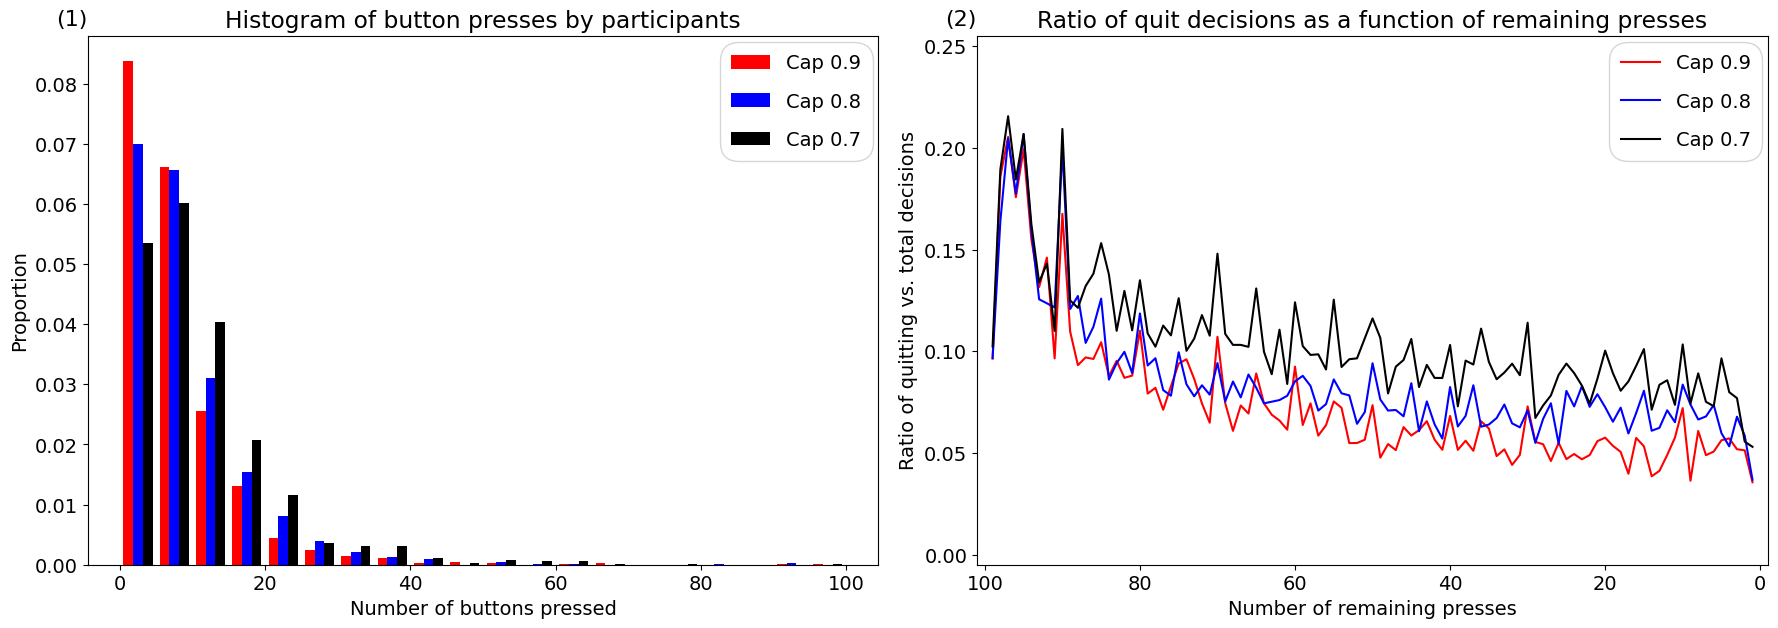

In [13]:
#Combined plot

colors = ['red', 'blue', 'black']

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(18,12))

ax = fig.add_subplot(221)
ax.set_title("Histogram of button presses by participants")
ax.annotate("(1)", xy=(-0.04, 1.02), xycoords='axes fraction', fontsize=16)
ax.set_xlabel("Number of buttons pressed")
ax.set_ylabel("Proportion")
ax.hist(num_buttons_experiment, density=True, bins=20, range=(0, 100), label=plot_legend, color=colors)
ax.legend(labelspacing = 1).get_frame().set_boxstyle('Round', pad=0.2, rounding_size=1)

ax = fig.add_subplot(222)
ax.set_title("Ratio of quit decisions as a function of remaining presses")
ax.annotate("(2)", xy=(-0.04, 1.02), xycoords='axes fraction', fontsize=16)
ax.set_xlabel("Number of remaining presses")
ax.set_xlim((-1,101))
ax.set_xticks(np.linspace(0, 100, num=6))
ax.set_ylabel("Ratio of quitting vs. total decisions")
ax.set_ylim((-0.005,0.255))
ax.set_yticks(np.linspace(0, 0.25, num=6))
for el, label, color in zip(experiment_aggr, plot_legend, colors):
    ax.plot(el[:,0],el[:,1]/(el[:,1]+el[:,2]), label=label, color=color)
ax.legend(labelspacing = 1).get_frame().set_boxstyle('Round', pad=0.2, rounding_size=1)
ax.invert_xaxis()

plt.tight_layout()
plt.show()

In [14]:
# Initialize lists to store the number of buttons used by each subject in each group
buttons_09 = []
buttons_08 = []
buttons_07 = []

# Iterate over the subjects in each group
for i, group in enumerate([0.9, 0.8, 0.7]):
    for subject in df[df['probability_truncation'] == group]['press_data']:
        # Convert the press data for the subject to a DataFrame
        subject_df = pd.DataFrame(subject)
        
        # Count the number of unique buttons used by the subject
        num_buttons = subject_df['button_number'].nunique()
        
        # Append the number of buttons to the appropriate list
        if i == 0:
            buttons_09.append(num_buttons)
        elif i == 1:
            buttons_08.append(num_buttons)
        else:
            buttons_07.append(num_buttons)

# Print the average number of buttons used by subjects in each group
print("Average number of buttons used in 0.9 cap group:", np.mean(buttons_09))
print("Average number of buttons used in 0.8 cap group:", np.mean(buttons_08))
print("Average number of buttons used in 0.7 cap group:", np.mean(buttons_07))

Average number of buttons used in 0.9 cap group: 7.665508253692441
Average number of buttons used in 0.8 cap group: 8.884444444444444
Average number of buttons used in 0.7 cap group: 10.710053859964093


In [15]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
_, p_09 = shapiro(buttons_09)
_, p_08 = shapiro(buttons_08)
_, p_07 = shapiro(buttons_07)

# Print the decision about normality
if p_09 > 0.05:
    print("Data in 0.9 cap group is considered normally distributed.")
else:
    print("Data in 0.9 cap group is not considered normally distributed.")

if p_08 > 0.05:
    print("Data in 0.8 cap group is considered normally distributed.")
else:
    print("Data in 0.8 cap group is not considered normally distributed.")

if p_07 > 0.05:
    print("Data in 0.7 cap group is considered normally distributed.")
else:
    print("Data in 0.7 cap group is not considered normally distributed.")

Data in 0.9 cap group is not considered normally distributed.
Data in 0.8 cap group is not considered normally distributed.
Data in 0.7 cap group is not considered normally distributed.


In [16]:
from scipy.stats import levene

# Perform Levene's test for homogeneity of variances
_, p_val = levene(buttons_09, buttons_08, buttons_07)

# Print the decision about homogeneity of variances
if p_val > 0.05:
    print("Variances are considered equal (homogeneous).")
else:
    print("Variances are not considered equal (homogeneous).")

Variances are not considered equal (homogeneous).


In [17]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H test
h_stat, p_val = kruskal(buttons_09, buttons_08, buttons_07)

print("H statistic:", h_stat)
print("p-value:", p_val)

alpha = 0.05  # Or whatever your chosen significance level is

if p_val > alpha:
    print("The p-value is greater than the chosen significance level. We fail to reject the null hypothesis (H0). This suggests that all samples come from the same distribution.")
else:
    print("The p-value is less than or equal to the chosen significance level. We reject the null hypothesis (H0) and accept the alternative hypothesis (H1). This suggests that at least one sample comes from a different distribution.")

H statistic: 101.31309438510728
p-value: 1.0003249060859212e-22
The p-value is less than or equal to the chosen significance level. We reject the null hypothesis (H0) and accept the alternative hypothesis (H1). This suggests that at least one sample comes from a different distribution.


In [18]:
import scikit_posthocs as sp

# Combine all groups into a single data array
data = buttons_09 + buttons_08 + buttons_07

# Create a group array indicating which group each data point belongs to
groups = ['0.9']*len(buttons_09) + ['0.8']*len(buttons_08) + ['0.7']*len(buttons_07)

# Perform Dunn's test
dunn_results = sp.posthoc_dunn([buttons_09, buttons_08, buttons_07], p_adjust='holm')

print(dunn_results)

# Print the decision about the pairwise comparisons
if dunn_results[1][2] < 0.05:
    print("There is a significant difference between the 0.9 and 0.8 cap groups.")
else:
    print("There is not a significant difference between the 0.9 and 0.8 cap groups.")

if dunn_results[2][3] < 0.05:
    print("There is a significant difference between the 0.9 and 0.7 cap groups.")
else:
    print("There is not a significant difference between the 0.9 and 0.7 cap groups.")

if dunn_results[1][3] < 0.05:
    print("There is a significant difference between the 0.8 and 0.7 cap groups.")
else:
    print("There is not a significant difference between the 0.8 and 0.7 cap groups.")

              1             2             3
1  1.000000e+00  1.404026e-05  3.014029e-23
2  1.404026e-05  1.000000e+00  2.748296e-08
3  3.014029e-23  2.748296e-08  1.000000e+00
There is a significant difference between the 0.9 and 0.8 cap groups.
There is a significant difference between the 0.9 and 0.7 cap groups.
There is a significant difference between the 0.8 and 0.7 cap groups.


In [19]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Perform pairwise Mann-Whitney U tests
_, p_09_08 = mannwhitneyu(buttons_09, buttons_08)
_, p_09_07 = mannwhitneyu(buttons_09, buttons_07)
_, p_08_07 = mannwhitneyu(buttons_08, buttons_07)

# Adjust p-values for multiple comparisons
_, pvals_corrected, _, _ = multipletests([p_09_08, p_09_07, p_08_07], method='holm')

print("Corrected p-values:", pvals_corrected)

# Print the decision about the pairwise comparisons
if pvals_corrected[0] < 0.05:
    print("There is a significant difference between the 0.9 and 0.8 cap groups.")
else:
    print("There is not a significant difference between the 0.9 and 0.8 cap groups.")

if pvals_corrected[1] < 0.05:
    print("There is a significant difference between the 0.9 and 0.7 cap groups.")
else:
    print("There is not a significant difference between the 0.9 and 0.7 cap groups.")

if pvals_corrected[2] < 0.05:
    print("There is a significant difference between the 0.8 and 0.7 cap groups.")
else:
    print("There is not a significant difference between the 0.8 and 0.7 cap groups.")

Corrected p-values: [1.29081046e-05 3.59849689e-23 2.52963923e-08]
There is a significant difference between the 0.9 and 0.8 cap groups.
There is a significant difference between the 0.9 and 0.7 cap groups.
There is a significant difference between the 0.8 and 0.7 cap groups.


# Early vs Later

In [20]:
# get number of buttons used by each subject before and after 50 trials for each group
buttons_before_09 = []
buttons_after_09 = []
buttons_before_08 = []
buttons_after_08 = []
buttons_before_07 = []
buttons_after_07 = []

# Iterate over the subjects in each group
for subject in df[df['probability_truncation'] == 0.9]['press_data']:
    # Convert the press data for the subject to a DataFrame
    subject_df = pd.DataFrame(subject)
    
    # Count the number of unique buttons used by the subject before and after 50 trials
    num_buttons_before = subject_df[subject_df['press_number'] <= 50]['button_number'].nunique()
    num_buttons_after = subject_df[subject_df['press_number'] > 50]['button_number'].nunique()
    
    # Append the number of buttons to the appropriate list
    buttons_before_09.append(num_buttons_before)
    buttons_after_09.append(num_buttons_after)
    
# Iterate over the subjects in each group
for subject in df[df['probability_truncation'] == 0.8]['press_data']:
    # Convert the press data for the subject to a DataFrame
    subject_df = pd.DataFrame(subject)
    
    # Count the number of unique buttons used by the subject before and after 50 trials
    num_buttons_before = subject_df[subject_df['press_number'] <= 50]['button_number'].nunique()
    num_buttons_after = subject_df[subject_df['press_number'] > 50]['button_number'].nunique()
    
    # Append the number of buttons to the appropriate list
    buttons_before_08.append(num_buttons_before)
    buttons_after_08.append(num_buttons_after)
    
# Iterate over the subjects in each group
for subject in df[df['probability_truncation'] == 0.7]['press_data']:
    # Convert the press data for the subject to a DataFrame
    subject_df = pd.DataFrame(subject)
    
    # Count the number of unique buttons used by the subject before and after 50 trials
    num_buttons_before = subject_df[subject_df['press_number'] <= 50]['button_number'].nunique()
    num_buttons_after = subject_df[subject_df['press_number'] > 50]['button_number'].nunique()
    
    # Append the number of buttons to the appropriate list
    buttons_before_07.append(num_buttons_before)
    buttons_after_07.append(num_buttons_after)
    
# Print the average number of buttons used by subjects in each group before and after 50 trials
print("Average number of buttons used in 0.9 cap group before 50 trials:", np.mean(buttons_before_09))
print("Average number of buttons used in 0.9 cap group after 50 trials:", np.mean(buttons_after_09))
print("Average number of buttons used in 0.8 cap group before 50 trials:", np.mean(buttons_before_08))
print("Average number of buttons used in 0.8 cap group after 50 trials:", np.mean(buttons_after_08))
print("Average number of buttons used in 0.7 cap group before 50 trials:", np.mean(buttons_before_07))
print("Average number of buttons used in 0.7 cap group after 50 trials:", np.mean(buttons_after_07))




Average number of buttons used in 0.9 cap group before 50 trials: 5.129452649869679
Average number of buttons used in 0.9 cap group after 50 trials: 3.489139878366638
Average number of buttons used in 0.8 cap group before 50 trials: 5.629333333333333
Average number of buttons used in 0.8 cap group after 50 trials: 4.182222222222222
Average number of buttons used in 0.7 cap group before 50 trials: 6.657989228007182
Average number of buttons used in 0.7 cap group after 50 trials: 4.952423698384201


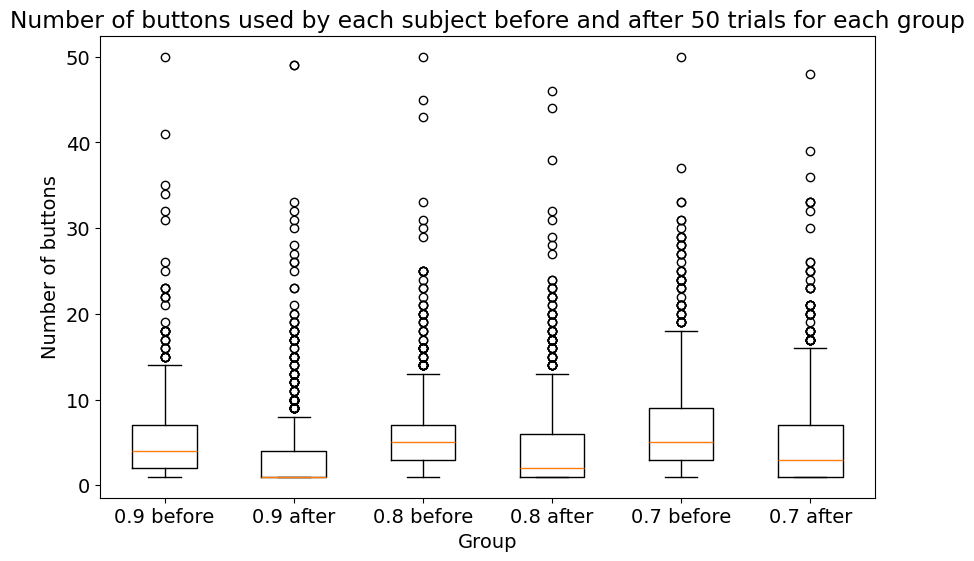

In [21]:
# create boxplot of number of buttons used by each subject before and after 50 trials for each group
plt.figure(figsize=(10, 6))

# Create a boxplot for each group
plt.boxplot([buttons_before_09, buttons_after_09, buttons_before_08, buttons_after_08, buttons_before_07, buttons_after_07],
            labels=['0.9 before', '0.9 after', '0.8 before', '0.8 after', '0.7 before', '0.7 after'])

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Number of buttons')
plt.title('Number of buttons used by each subject before and after 50 trials for each group')

# Show the plot
plt.show()

In [22]:
# Perform the Shapiro-Wilk test for normality
_, p_09_before = shapiro(buttons_before_09)
_, p_09_after = shapiro(buttons_after_09)
_, p_08_before = shapiro(buttons_before_08)
_, p_08_after = shapiro(buttons_after_08)
_, p_07_before = shapiro(buttons_before_07)
_, p_07_after = shapiro(buttons_after_07)

# Print the decision about normality
if p_09_before > 0.05:
    print("Data in 0.9 cap group before 50 trials is considered normally distributed.")
else:
    print("Data in 0.9 cap group before 50 trials is not considered normally distributed.")
    
if p_09_after > 0.05:
    print("Data in 0.9 cap group after 50 trials is considered normally distributed.")
else:
    print("Data in 0.9 cap group after 50 trials is not considered normally distributed.")
    

Data in 0.9 cap group before 50 trials is not considered normally distributed.
Data in 0.9 cap group after 50 trials is not considered normally distributed.


In [111]:
# from scipy.stats import wilcoxon
# # Perform the Wilcoxon test for the before-after pairs in each group
# stat_09, p_09 = wilcoxon(buttons_before_09, buttons_after_09)
# stat_08, p_08 = wilcoxon(buttons_before_08, buttons_after_08)
# stat_07, p_07 = wilcoxon(buttons_before_07, buttons_after_07)

# # Print the results
# print("\nWilcoxon test for 0.9 group: Statistic = %.3f, p = %.3f" % (stat_09, p_09))
# print("Wilcoxon test for 0.8 group: Statistic = %.3f, p = %.3f" % (stat_08, p_08))
# print("Wilcoxon test for 0.7 group: Statistic = %.3f, p = %.3f" % (stat_07, p_07))

# # Interpretation
# alpha = 0.05
# for group, p in zip(['0.9', '0.8', '0.7'], [p_09, p_08, p_07]):
#     if p > alpha:
#         print(f"For the {group} group, the number of buttons used before and after 50 trials come from the same distribution (fail to reject H0)")
#     else:
#         print(f"For the {group} group, the number of buttons used before and after 50 trials come from different distributions (reject H0)")



Wilcoxon test for 0.9 group: Statistic = 100872.000, p = 0.000
Wilcoxon test for 0.8 group: Statistic = 122626.500, p = 0.000
Wilcoxon test for 0.7 group: Statistic = 120485.500, p = 0.000
For the 0.9 group, the number of buttons used before and after 50 trials come from different distributions (reject H0)
For the 0.8 group, the number of buttons used before and after 50 trials come from different distributions (reject H0)
For the 0.7 group, the number of buttons used before and after 50 trials come from different distributions (reject H0)


### Optimal Strategy vs Human Data (Before-After) : 

In [23]:
! cd Simulations; make
import os
#Loading simulation routines
os.environ['SIMULATION_ROUTINES_PATH'] = os.getcwd() + '/Simulations/'
sys.path.append('Simulations')
import cpp_routines as sim
#Loading decision processing routines
import data_process as dp


g++  -o run  obj/run.o -lm
g++  -shared -o routines_lib.so  obj/routines_lib.o -lm


In [24]:
def run_simulation(truncation, run_time, number_of_runs):
    run_time = 100
    number_of_runs = 10000
    button_prior = (1, 1)
    policy_prior = (1, 1)

    # button = sim.Button('Bernoulli', prior=(1, 1))
    # button = sim.Button('Bernoulli', prior=button_prior)
    button = sim.Button('Truncated', truncation=0.7)
    # policy = sim.Policy('Bernoulli', prior=policy_prior)
    policy = sim.Policy('Truncated', truncation=0.7)
    # policy = sim.Policy('Difference', difference=4)

    trial_record = sim.record_full_trials(run_time, number_of_runs, button, policy)

    #Analysing decisions with data_process routines
    processed_decisions = dp.Decision_Process(trial_record)
    return processed_decisions

def before_after_split(processed_decisions):
    before=[]
    after=[]
    for data in enumerate(processed_decisions.subjects_button_activity):
        # print("Subject " + str(data[0]) + " has explored " + str(len(data[1])) + " buttons")
        num_diff_button_pressed_before = 0
        num_diff_button_pressed_after = 0
        total_presses = 0
        for i,button in enumerate(data[1]):
            # print("Button " + str(i) + " has " + str(button[-1,0]) + " wins and " + str(button[-1,1]) + " fails" + ", :" + str(button[-1,0] + button[-1,1]))
            # total number of presses
            total_presses += button[-1,0] + button[-1,1]
            if(total_presses < 50):
                num_diff_button_pressed_before += 1
            else:
                num_diff_button_pressed_after += 1
        before.append(num_diff_button_pressed_before)
        after.append(num_diff_button_pressed_after) 
        
    return before, after
    
experiment_07 = run_simulation(0.7, 100, 10000)
experiment_08 = run_simulation(0.8, 100, 10000)
experiment_09 = run_simulation(0.9, 100, 10000)
# print everything for 0.7 experiment
button_before_07_os , button_after_07_os = before_after_split(experiment_07)
button_before_08_os , button_after_08_os = before_after_split(experiment_08)
button_before_09_os , button_after_09_os = before_after_split(experiment_09)

In [127]:
from scipy.stats import wilcoxon, mannwhitneyu

def perform_wilcoxon_test(before, after):
    stat, p = wilcoxon(before, after)
    return stat, p

def perform_mannwhitneyu_test(group1, group2):
    stat, p = mannwhitneyu(group1, group2)
    return stat, p

def print_results(test_name, stat, p, alpha=0.05):
    print(f'{test_name}: Statistics={stat:.3f}, p={p:.3f}')
    if(p==0):
        print('extremely unlikely')
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

# Perform tests and print results for each group
list_os_before = [button_before_07_os, button_before_08_os, button_before_09_os]
list_os_after = [button_after_07_os, button_after_08_os, button_after_09_os]
list_rhd_before = [buttons_before_07, buttons_before_08, buttons_before_09]
list_rhd_after = [buttons_after_07, buttons_after_08, buttons_after_09]

# Perform tests and print results for each group
interpretations_os_wilcox = []
interpretations_rhd_wilcox = []
interpretations_before_mannwhitney = []
interpretations_after_mannwhitney = []

for i in range(3):
    stat_os, p_os = perform_wilcoxon_test(list_os_before[i], list_os_after[i])
    stat_real, p_real = perform_wilcoxon_test(list_rhd_before[i], list_rhd_after[i])
    stat_before, p_before = perform_mannwhitneyu_test(list_os_before[i], list_rhd_before[i])
    stat_after, p_after = perform_mannwhitneyu_test(list_os_after[i], list_rhd_after[i])

    print(f'Results for group 0{i+7}:')
    interpretations_os_wilcox.append(print_results('Wilcoxon test for OS', stat_os, p_os))
    interpretations_rhd_wilcox.append(print_results('Wilcoxon test for RHD', stat_real, p_real))
    interpretations_before_mannwhitney.append(print_results('Mann-Whitney U test for before', stat_before, p_before))
    interpretations_after_mannwhitney.append(print_results('Mann-Whitney U test for after', stat_after, p_after))
    print()

Results for group 07:
Wilcoxon test for OS: Statistics=3176819.000, p=0.000
extremely unlikely
Different distribution (reject H0)
Wilcoxon test for RHD: Statistics=120485.500, p=0.000
Different distribution (reject H0)
Mann-Whitney U test for before: Statistics=5651111.500, p=0.424
Same distribution (fail to reject H0)
Mann-Whitney U test for after: Statistics=2910396.000, p=0.000
Different distribution (reject H0)

Results for group 08:
Wilcoxon test for OS: Statistics=3073486.000, p=0.000
extremely unlikely
Different distribution (reject H0)
Wilcoxon test for RHD: Statistics=122626.500, p=0.000
Different distribution (reject H0)
Mann-Whitney U test for before: Statistics=6266351.500, p=0.000
Different distribution (reject H0)
Mann-Whitney U test for after: Statistics=3584736.500, p=0.000
Different distribution (reject H0)

Results for group 09:
Wilcoxon test for OS: Statistics=3308768.000, p=0.000
extremely unlikely
Different distribution (reject H0)
Wilcoxon test for RHD: Statistics

In [2]:
import matplotlib.pyplot as plt

# Create a list of all data lists
data_lists = [list_os_before, list_os_after, list_rhd_before, list_rhd_after]

# Create a list of labels for the box plots
labels = ['OS Before', 'OS After', 'RHD Before', 'RHD After']

# Create a new figure
plt.figure()

# Create a box plot for each data list
for i in range(len(data_lists)):
    plt.subplot(1, len(data_lists), i+1)
    plt.boxplot(data_lists[i])
    plt.title(labels[i])

# Show the plot
plt.show()

NameError: name 'list_os_before' is not defined

# Regression Analysis

In [ ]:
# for each participant, calculate the number of presses for each button, store total number of press each button_number gets across participants, do this separately for each group
button_presses_09 = {}
button_presses_08 = {}
button_presses_07 = {}

for group in [0.9, 0.8, 0.7]:
    for subject in df[df['probability_truncation'] == group]['press_data']:
        # Convert the press data for the subject to a DataFrame
        subject_df = pd.DataFrame(subject)
        
        # Count the number of presses each button_number gets
        button_press_counts = subject_df['button_number'].value_counts()
        
        # Store the counts in the appropriate dictionary
        if group == 0.9:
            for button_number, count in button_press_counts.items():
                if button_number not in button_presses_09:
                    button_presses_09[button_number] = count
                else:
                    button_presses_09[button_number] += count
        elif group == 0.8:
            for button_number, count in button_press_counts.items():
                if button_number not in button_presses_08:
                    button_presses_08[button_number] = count
                else:
                    button_presses_08[button_number] += count
        else:
            for button_number, count in button_press_counts.items():
                if button_number not in button_presses_07:
                    button_presses_07[button_number] = count
                else:
                    button_presses_07[button_number] += count

from scipy.stats import spearmanr

# Calculate the Spearman rank-order correlation coefficient for each group
spearman_09 = spearmanr(list(button_presses_09.keys()), list(button_presses_09.values()))
spearman_08 = spearmanr(list(button_presses_08.keys()), list(button_presses_08.values()))
spearman_07 = spearmanr(list(button_presses_07.keys()), list(button_presses_07.values()))

print("Spearman correlation for 0.9 group: ", spearman_09)
print("Spearman correlation for 0.8 group: ", spearman_08)
print("Spearman correlation for 0.7 group: ", spearman_07)

Spearman correlation for 0.9 group:  SignificanceResult(statistic=-0.9897863941147865, pvalue=7.0648307200316955e-84)
Spearman correlation for 0.8 group:  SignificanceResult(statistic=-0.9871757905351997, pvalue=4.0985265755194703e-75)
Spearman correlation for 0.7 group:  SignificanceResult(statistic=-0.990288084109721, pvalue=4.49185462404607e-84)
